In [ ]:

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/HAR')

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataTest = pd.read_csv('og data/dataTest.csv')
dataTrain = pd.read_csv('og data/dataTrain.csv')
yTrain = pd.read_csv('yTrain.csv')
yTest = pd.read_csv('yTest.csv')

yTrain  = yTrain.iloc[:,1]
yTest = yTest.iloc[:,1]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.layers import Dropout

num_classes = yTrain.value_counts().shape[0]

onehot = lambda Y:to_categorical(Y - 1, num_classes=num_classes)
yTrain_onehot = onehot(yTrain)
yTest_onehot =  onehot(yTest)


model = Sequential()
model.add(LSTM(64, input_shape=(dataTrain.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(dataTrain, yTrain_onehot, epochs=100, batch_size=32)



Epoch 1/100
184/184 [==============================] - 8s 19ms/step - loss: 1.2982 - accuracy: 0.3416
Epoch 2/100
184/184 [==============================] - 3s 17ms/step - loss: 1.0975 - accuracy: 0.4316
Epoch 3/100
184/184 [==============================] - 3s 18ms/step - loss: 0.9547 - accuracy: 0.5480
Epoch 4/100
184/184 [==============================] - 4s 23ms/step - loss: 0.8143 - accuracy: 0.6011
Epoch 5/100
184/184 [==============================] - 3s 18ms/step - loss: 0.7481 - accuracy: 0.6378
Epoch 6/100
184/184 [==============================] - 3s 17ms/step - loss: 0.6866 - accuracy: 0.6774
Epoch 7/100
184/184 [==============================] - 4s 19ms/step - loss: 0.6253 - accuracy: 0.7283
Epoch 8/100
184/184 [==============================] - 4s 23ms/step - loss: 0.6807 - accuracy: 0.7096
Epoch 9/100
184/184 [==============================] - 3s 17ms/step - loss: 0.5763 - accuracy: 0.7523
Epoch 10/100
184/184 [==============================] - 3s 17ms/step - loss: 0.565

In [ ]:
y_pred = model.predict(dataTest)


46/46 [==============================] - 1s 8ms/step



ROC-AUC Score: 0.9964
Accuracy Score: 0.9402


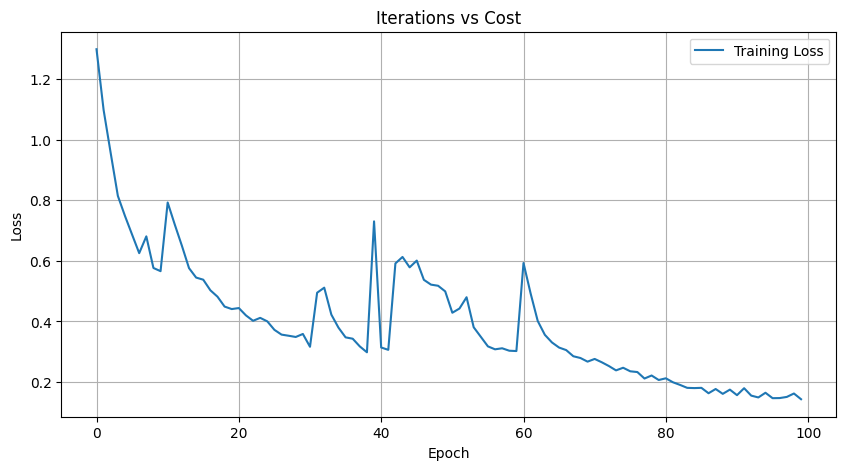

Confusion Matrix:


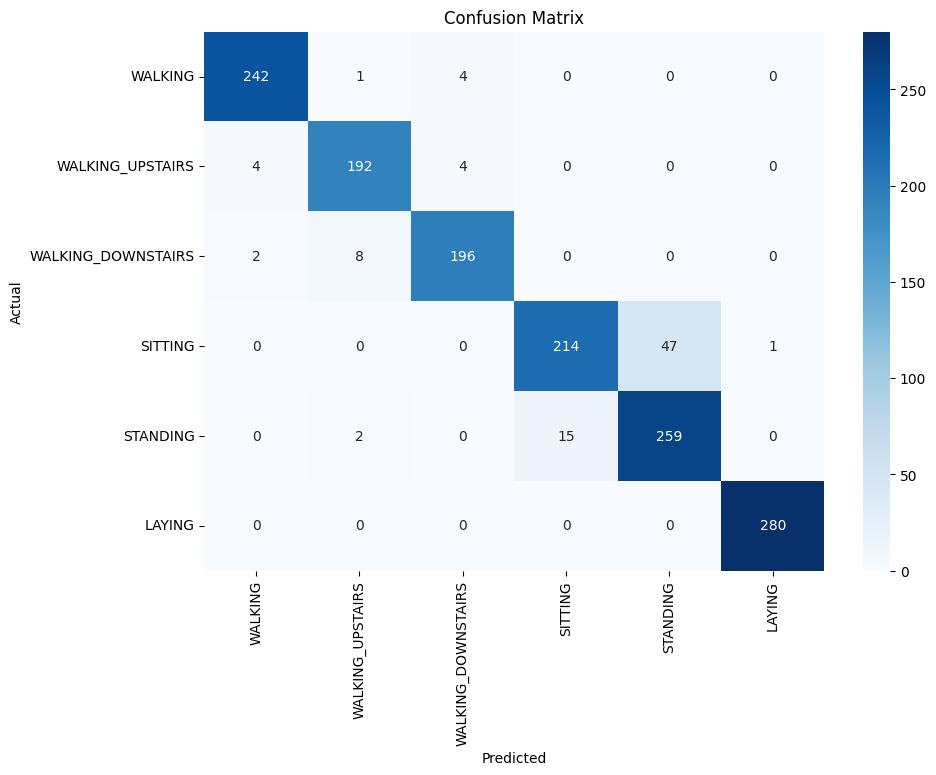

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.98      0.98      0.98       247
  WALKING_UPSTAIRS       0.95      0.96      0.95       200
WALKING_DOWNSTAIRS       0.96      0.95      0.96       206
           SITTING       0.93      0.82      0.87       262
          STANDING       0.85      0.94      0.89       276
            LAYING       1.00      1.00      1.00       280

          accuracy                           0.94      1471
         macro avg       0.94      0.94      0.94      1471
      weighted avg       0.94      0.94      0.94      1471

Mean Average Precision: 0.9839
Mean Average Recall: 0.9411

Class-wise Precision, Recall, and F1 Score:
Class 1 (WALKING): Precision: 0.9758, Recall: 0.9798, F1 Score: 0.9778
Class 2 (WALKING_UPSTAIRS): Precision: 0.9458, Recall: 0.9600, F1 Score: 0.9529
Class 3 (WALKING_DOWNSTAIRS): Precision: 0.9608, Recall: 0.9515, F1 Score: 0.9561
Class 4 (SITTING): Precision: 0.9345,

<Figure size 800x1200 with 0 Axes>

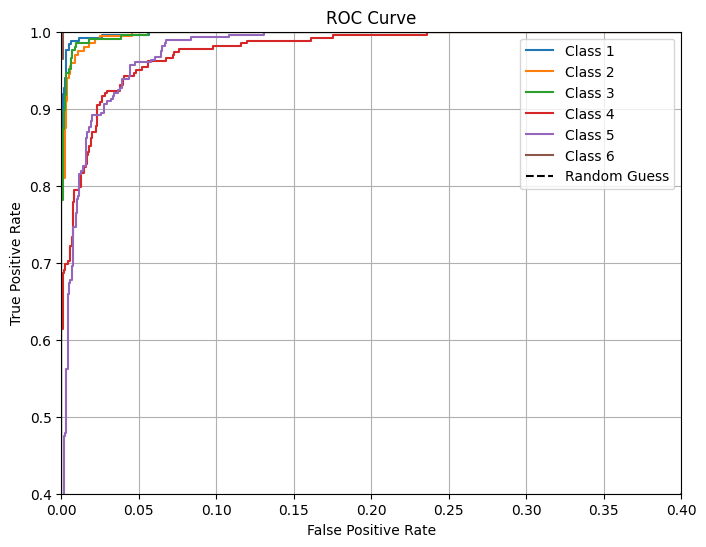

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_auc_score, confusion_matrix, classification_report,
                             average_precision_score, recall_score, precision_score,
                             f1_score, accuracy_score, roc_curve, auc)
from sklearn.preprocessing import label_binarize

def evaluate_model(y_test, y_pred, history):

    y_test = y_test-1
    y_pred = np.array(y_pred)

    y_test_one_hot = label_binarize(y_test, classes=np.arange(num_classes))
    # Convert y_pred from probabilities to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr')
    print(f'\nROC-AUC Score: {roc_auc:.4f}')

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred_labels)
    print(f'Accuracy Score: {accuracy:.4f}')

    # Plotting Iterations vs Cost
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Iterations vs Cost')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_labels)
    print('Confusion Matrix:')
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report (Precision, Recall, F1 Score)
    class_report = classification_report(y_test, y_pred_labels, target_names=labels)
    print('Classification Report:')
    print(class_report)

    # Mean Average Precision and Recall
    avg_precision = average_precision_score(y_test_one_hot, y_pred, average='macro')
    avg_recall = recall_score(y_test, y_pred_labels, average='macro')
    print(f'Mean Average Precision: {avg_precision:.4f}')
    print(f'Mean Average Recall: {avg_recall:.4f}')

    # Class-wise Precision, Recall, and F1 Score
    precision = precision_score(y_test, y_pred_labels, average=None)
    recall = recall_score(y_test, y_pred_labels, average=None)
    f1 = f1_score(y_test, y_pred_labels, average=None)

    print('\nClass-wise Precision, Recall, and F1 Score:')
    for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
        print(f'Class {i+1} ({labels[i]}): Precision: {p:.4f}, Recall: {r:.4f}, F1 Score: {f:.4f}')


    plt.figure(figsize=(8,12))
    n_classes = y_test_one_hot.shape[1]
    all_fpr = np.array([])
    all_tpr = np.array([])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
        plt.plot(fpr, tpr, label=f'Class {i+1}')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0, 0.4])
    plt.ylim([0.4, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


evaluate_model(yTest, y_pred, history)


In [ ]:
dataTest_pca = pd.read_csv('pca datasets/dataTest_pca.csv')
dataTrain_pca = pd.read_csv('pca datasets/dataTrain_pca.csv')



In [ ]:
history_pca = model.fit(dataTrain_pca, yTrain_onehot, epochs=100, batch_size=32)
y_pred_pca = model.predict(dataTest_pca)



Epoch 1/100
184/184 [==============================] - 2s 12ms/step - loss: 0.5933 - accuracy: 0.7528
Epoch 2/100
184/184 [==============================] - 2s 12ms/step - loss: 0.5368 - accuracy: 0.7749
Epoch 3/100
184/184 [==============================] - 2s 11ms/step - loss: 0.5533 - accuracy: 0.7657
Epoch 4/100
184/184 [==============================] - 2s 8ms/step - loss: 0.5176 - accuracy: 0.7842
Epoch 5/100
184/184 [==============================] - 2s 8ms/step - loss: 0.5069 - accuracy: 0.7919
Epoch 6/100
184/184 [==============================] - 2s 9ms/step - loss: 0.4862 - accuracy: 0.7985
Epoch 7/100
184/184 [==============================] - 2s 11ms/step - loss: 0.4858 - accuracy: 0.8039
Epoch 8/100
184/184 [==============================] - 2s 11ms/step - loss: 0.4974 - accuracy: 0.7929
Epoch 9/100
184/184 [==============================] - 1s 8ms/step - loss: 0.4475 - accuracy: 0.8182
Epoch 10/100
184/184 [==============================] - 1s 8ms/step - loss: 0.4525 - a


ROC-AUC Score: 0.9905
Accuracy Score: 0.8906


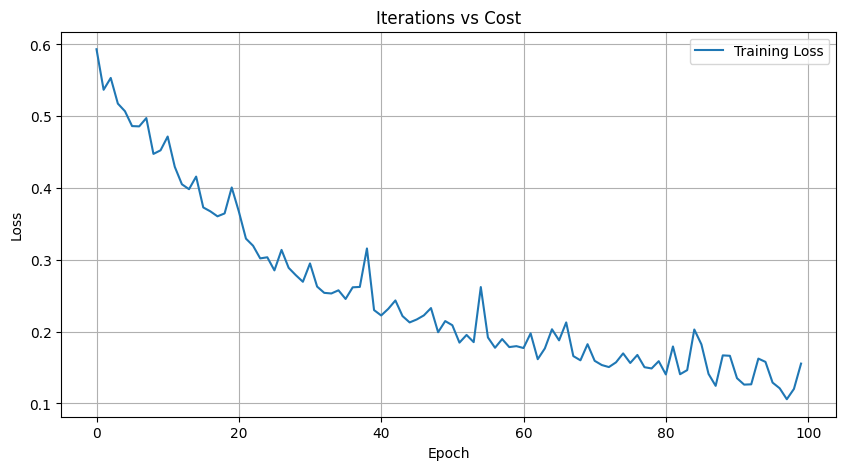

Confusion Matrix:


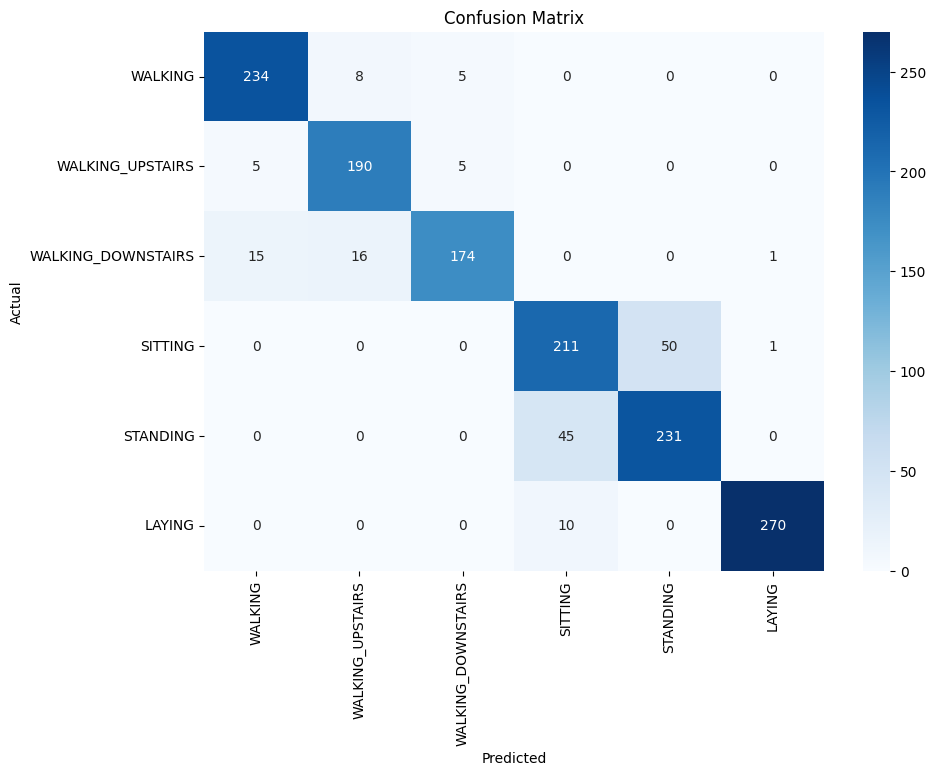

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.92      0.95      0.93       247
  WALKING_UPSTAIRS       0.89      0.95      0.92       200
WALKING_DOWNSTAIRS       0.95      0.84      0.89       206
           SITTING       0.79      0.81      0.80       262
          STANDING       0.82      0.84      0.83       276
            LAYING       0.99      0.96      0.98       280

          accuracy                           0.89      1471
         macro avg       0.89      0.89      0.89      1471
      weighted avg       0.89      0.89      0.89      1471

Mean Average Precision: 0.9552
Mean Average Recall: 0.8914

Class-wise Precision, Recall, and F1 Score:
Class 1 (WALKING): Precision: 0.9213, Recall: 0.9474, F1 Score: 0.9341
Class 2 (WALKING_UPSTAIRS): Precision: 0.8879, Recall: 0.9500, F1 Score: 0.9179
Class 3 (WALKING_DOWNSTAIRS): Precision: 0.9457, Recall: 0.8447, F1 Score: 0.8923
Class 4 (SITTING): Precision: 0.7932,

<Figure size 800x1200 with 0 Axes>

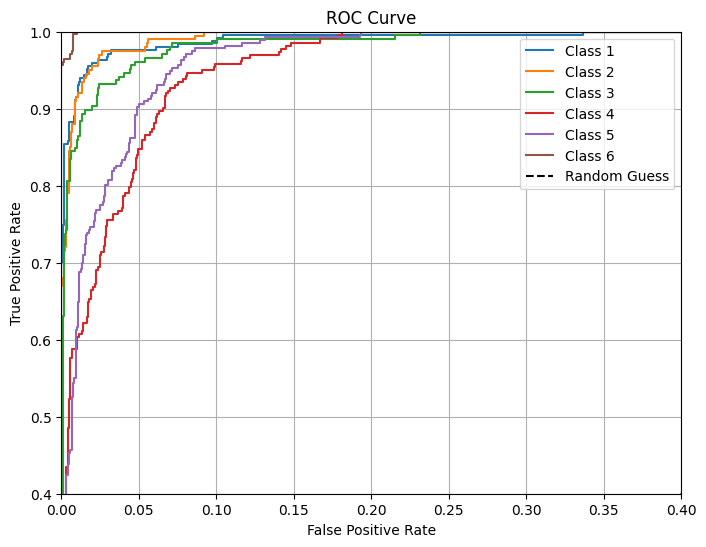

In [ ]:
evaluate_model(yTest, y_pred_pca, history_pca)

In [ ]:
dataTest_rfecv = pd.read_csv('rfecv stuff/dataTest_rfecv.csv')
dataTrain_rfecv = pd.read_csv('rfecv stuff/dataTrain_rfecv.csv')




In [ ]:
history_rfecv = model.fit(dataTrain_rfecv, yTrain_onehot, epochs=100, batch_size=32)
y_pred_rfecv = model.predict(dataTest_rfecv)



Epoch 1/100
184/184 [==============================] - 3s 19ms/step - loss: 1.0570 - accuracy: 0.5873
Epoch 2/100
184/184 [==============================] - 4s 19ms/step - loss: 0.6241 - accuracy: 0.7060
Epoch 3/100
184/184 [==============================] - 3s 16ms/step - loss: 0.5568 - accuracy: 0.7439
Epoch 4/100
184/184 [==============================] - 3s 16ms/step - loss: 0.5214 - accuracy: 0.7740
Epoch 5/100
184/184 [==============================] - 3s 16ms/step - loss: 0.4579 - accuracy: 0.8060
Epoch 6/100
184/184 [==============================] - 4s 22ms/step - loss: 0.4156 - accuracy: 0.8283
Epoch 7/100
184/184 [==============================] - 3s 16ms/step - loss: 0.3836 - accuracy: 0.8400
Epoch 8/100
184/184 [==============================] - 3s 16ms/step - loss: 0.3586 - accuracy: 0.8601
Epoch 9/100
184/184 [==============================] - 3s 16ms/step - loss: 0.3343 - accuracy: 0.8633
Epoch 10/100
184/184 [==============================] - 4s 19ms/step - loss: 0.315


ROC-AUC Score: 0.9969
Accuracy Score: 0.9402


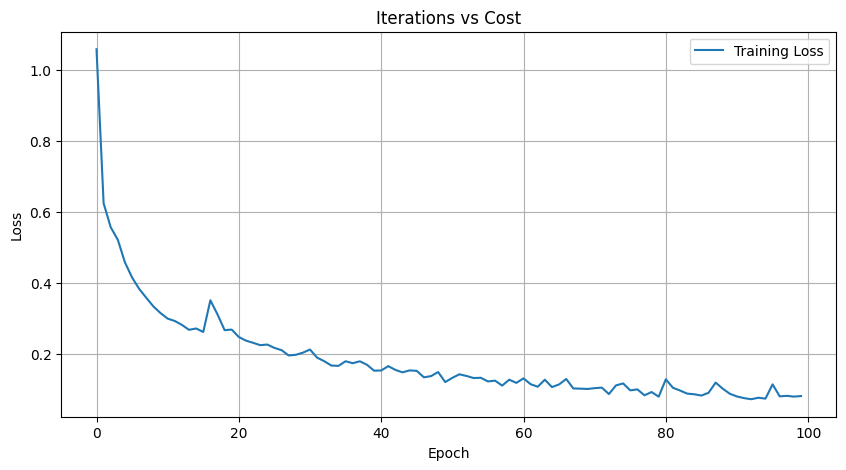

Confusion Matrix:


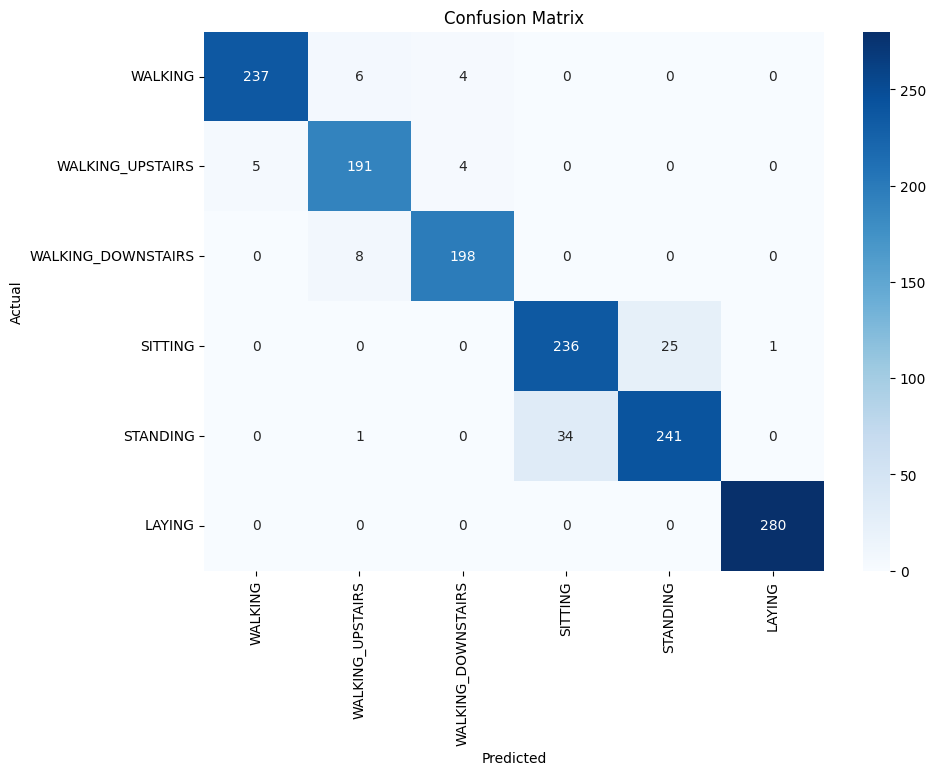

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.98      0.96      0.97       247
  WALKING_UPSTAIRS       0.93      0.95      0.94       200
WALKING_DOWNSTAIRS       0.96      0.96      0.96       206
           SITTING       0.87      0.90      0.89       262
          STANDING       0.91      0.87      0.89       276
            LAYING       1.00      1.00      1.00       280

          accuracy                           0.94      1471
         macro avg       0.94      0.94      0.94      1471
      weighted avg       0.94      0.94      0.94      1471

Mean Average Precision: 0.9860
Mean Average Recall: 0.9416

Class-wise Precision, Recall, and F1 Score:
Class 1 (WALKING): Precision: 0.9793, Recall: 0.9595, F1 Score: 0.9693
Class 2 (WALKING_UPSTAIRS): Precision: 0.9272, Recall: 0.9550, F1 Score: 0.9409
Class 3 (WALKING_DOWNSTAIRS): Precision: 0.9612, Recall: 0.9612, F1 Score: 0.9612
Class 4 (SITTING): Precision: 0.8741,

<Figure size 800x1200 with 0 Axes>

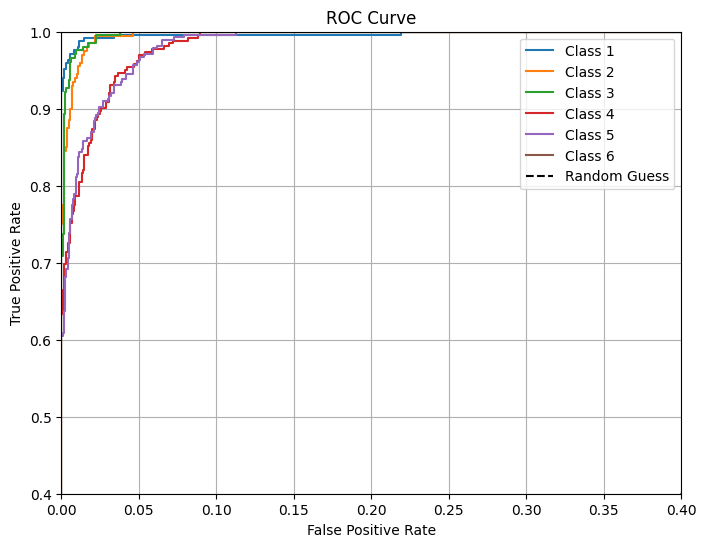

In [ ]:
evaluate_model(yTest, y_pred_rfecv, history_rfecv)

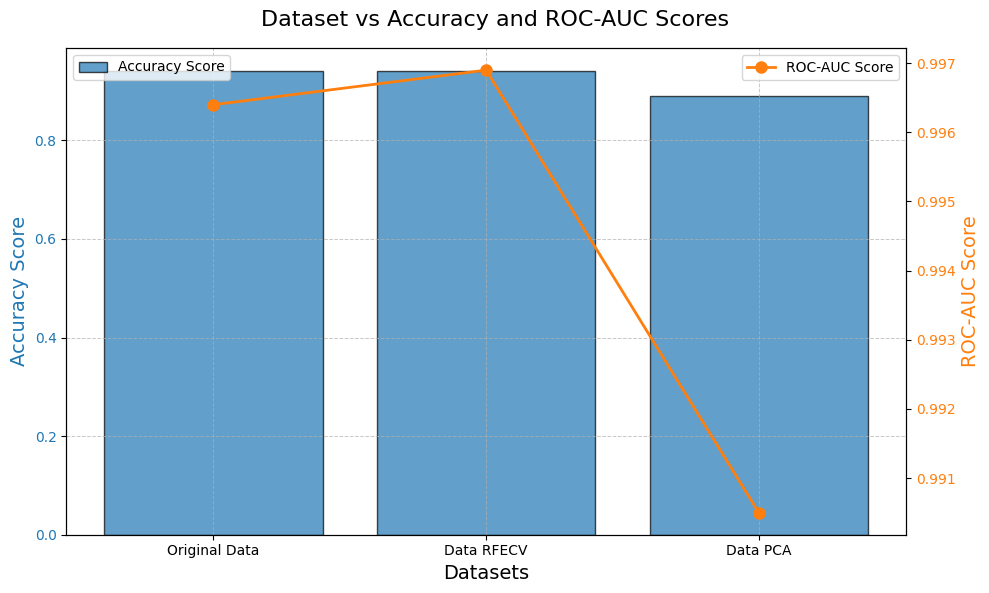

In [ ]:
import matplotlib.pyplot as plt

# Data
datasets = ['Original Data', 'Data RFECV', 'Data PCA']
accuracies = [0.9402, 0.9402, 0.8906]
roc_auc_scores = [0.9964, 0.9969, 0.9905]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# accuracy scores
color = 'tab:blue'
ax1.set_xlabel('Datasets', fontsize=14)
ax1.set_ylabel('Accuracy Score', color=color, fontsize=14)
bars = ax1.bar(datasets, accuracies, color=color, alpha=0.7, edgecolor='black', label='Accuracy Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# a second y-axis to plot ROC-AUC scores
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC-AUC Score', color=color, fontsize=14)
line = ax2.plot(datasets, roc_auc_scores, color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='ROC-AUC Score')
ax2.tick_params(axis='y', labelcolor=color)

#  titles, legends, and plot
fig.suptitle('Dataset vs Accuracy and ROC-AUC Scores', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()
